∅ → X at a rate 1

X → Y at rate 2

2 X + Y → 3 X at rate 0.02

X → ∅ at rate 0.04

The rate of change of [X] is given by the rate of creation of X minus the rate of consumption of X. Similarly, the rate of change of [Y] is given by the rate of creation of Y minus the rate of consumption of Y.

This results in the following system of differential equations:

d[X]/dt = 1 (from the first reaction) - 2[X] (from the second reaction) + 0.02[X]^2[Y] (from the third reaction, noting that X is created here) - 0.04[X] (from the fourth reaction)

So, the differential equation for [X] is:

d[X]/dt = 1 - 2[X] + 0.02[X]^2[Y] - 0.04[X]

Simplify to get:

d[X]/dt = 1 - 2.04[X] + 0.02[X]^2*[Y]

The differential equation for [Y] is:

d[Y]/dt = 2[X] (from the second reaction) - 0.02[X]^2[Y] (from the third reaction)

So, we get:

d[Y]/dt = 2[X] - 0.02[X]^2[Y]

This system of differential equations describes the rate of change of the concentrations of X and Y in the chemical reactions.

## Task 2: Solve the system of differential equations

x(t) 4.000000001014821
y(t) 24.999999993681545


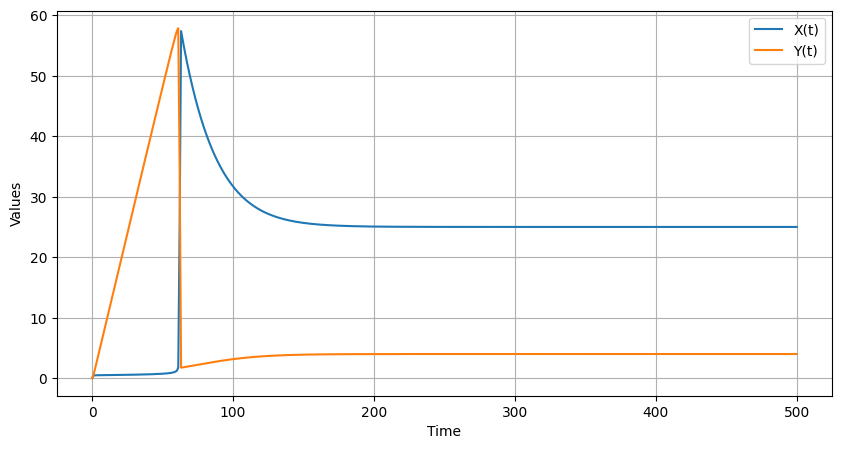

In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Defining model equations (coupled differential equations)
def model(z, t):
    x, y = z
    dxdt = 1 - 2*x + 0.02*x*x*y - 0.04*x
    dydt = 2*x - 0.02*x*x*y
    return [dxdt, dydt]

# Initial conditions: X(0)=Y(0)=0
z0 = [0, 0]

# Time grid (0-500)
t = np.linspace(0, 500, 500)

# Solve differential equation system
solution = odeint(model, z0, t)
print("x(t)",solution[499, 1])
print("y(t)",solution[499, 0])
# Plot solution
plt.figure(figsize=(10, 5))
plt.plot(t, solution[:, 0], label='X(t)')
plt.plot(t, solution[:, 1], label='Y(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()



## Task3 Gillespie's algorithm

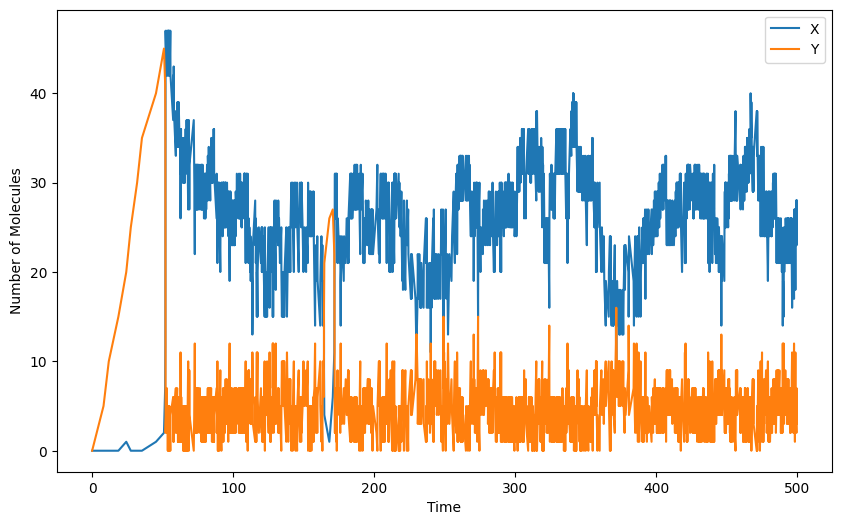

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial conditions and parameters
X = 0
Y = 0
t = 0
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04
t_end = 500

# Store the results
X_values = [X]
Y_values = [Y]
t_values = [t]

# Gillespie simulation
while t < t_end:
    rates = np.array([k1, k2*X, k3*X*X*Y, k4*X])  # Convert list to numpy array
    rate_sum = np.sum(rates)

    dt = -np.log(np.random.rand())/rate_sum
    t += dt

    reaction_choice = np.random.choice([0, 1, 2, 3], p=rates/rate_sum)

    if reaction_choice == 0:
        X += 1
    elif reaction_choice == 1:
        X -= 1
        Y += 1
    elif reaction_choice == 2:
        X += 1
        Y -= 1
    elif reaction_choice == 3:
        X -= 1

    # Save values if either X or Y has changed by at least 5
    if abs(X - X_values[-1]) >= 5 or abs(Y - Y_values[-1]) >= 5:
        X_values.append(X)
        Y_values.append(Y)
        t_values.append(t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, X_values, label='X')
plt.plot(t_values, Y_values, label='Y')
plt.xlabel('Time')
plt.ylabel('Number of Molecules')
plt.legend()
plt.show()



The number of Y molecules initially grows much faster than the number of X molecules, then immediately decreases to a smaller number, and subsequently X and Y remain in this 'equilibrium' state, with the number of Y molecules remaining smaller than the number of X. The equilibrium state of the Y molecules is clearer than that of the X molecules, however this is to be expected as generally the number of X molecules remains larger, so any slight fluctuations are more apparent in the data.

